# Binomial logistic regression. Part 1


Build and evaluate a binomial logistic regression model using pandas and sickit-learn for operations, and seaborn for plotting.

## Relevant imports

Begin by importing the relevant packages and data.

In [1]:
# Import pandas and seaborn packages
import os
import pandas as pd
import seaborn as sns

## Exploratory data analysis 

In [2]:
path = os.getcwd()

In [3]:
csv_filename = r"activity.csv"

In [4]:
fullpath = os.path.join(path, csv_filename)

In [5]:
# import the data
activity = pd.read_csv(fullpath)

In [6]:
# Get summary statistics about the dataset
activity.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


In [7]:
# Examine the dataset
activity.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


## Construct binomial logistic regression model

For binomial logistic regression, the `scikit-learn` package will be used, which is frequently used for machine learning and more advanced data science topics. Only load in the functions we need: `train_test_split()` and `LogisticRegression()`.

In [8]:
# Load in sci-kit learn functions for constructing logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Save the data into variables called $X$ and $y$ to use the `train_test_split()` function more easily. Subset specific columns of a DataFrame object by using double square brackets: `[[]]` and listing the columns in between, separated by commas.

In [9]:
# Save X and y data into variables
X = activity[["Acc (vertical)"]]
y = activity[["LyingDown"]]

Split the data into training and holdout datasets. Set the `test_size` to `0.3` so that the holdout dataset is only 30% of the total data. Set the `random_state` equal to `42`. Setting the `random_state` is mainly for reproducibility purposes.

In [10]:
# Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Build the classifier, and fit the model to the data by using the `.fit()` function. Save the fitted model as a variable called `clf`.

In [11]:
# transform y_train to a 1D series, instead of a 2D DataFrame 
y_train = y_train["LyingDown"]

In [12]:
# classifier logistic function
clf = LogisticRegression().fit(X_train,y_train)

## Get coefficients and visualize model

Use the `coef_` and `intercept_` attributes of the `clf` object to get the coefficient and intercept of our model.

In [13]:
# Print the coefficient
clf.coef_

array([[-0.1177471]])

In [14]:
# Print the intercept
clf.intercept_

array([6.10180958])

The model has an intercept or $\beta_0$ of 6.10 and a $\beta_1$ of -0.12. Now, plot the model and data with a 95% confidence band using the `regplot()` function from the `seaborn` package. Set the argument `logistic=True` so that the function knows is plotting a logistic regression model, not a linear regression model.

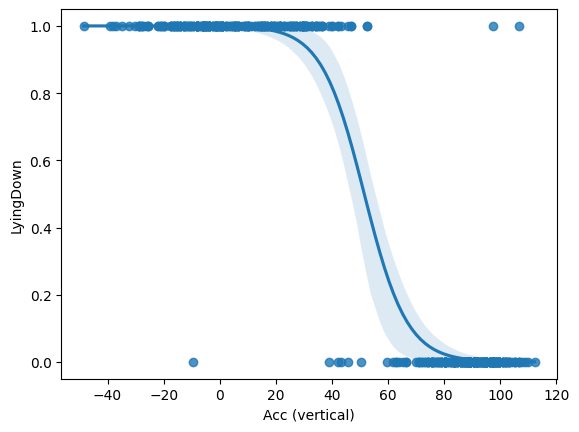

In [16]:
# Plot the logistic regression and its confidence band
sns.regplot(x="Acc (vertical)", y="LyingDown", data=activity, logistic=True);

# Confusion matrix. Part 2

**Confusion matrices** are used to evaluate classification models, such as a binomial logistic regression model. 

## Construct logistic regression model

Split the data, which is currently saved as variables `X` and `y`, into training and holdout datasets using the `train_test_split()` function. The function has already been imported from the `scikit-learn` package. Then, build the model by using the `LogisticRegression()` function with the `.fit()` function.

Save the model's predictions by inputting the holdout sample, `X_test` into the model's `.predict()` function.

In [18]:
# Split data into training and holdout samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# transform y_train to a 1D series, instead of a 2D DataFrame 
y_train = y_train["LyingDown"]

# Build regression model
clf = LogisticRegression().fit(X_train,y_train)

# Save predictions
y_pred = clf.predict(X_test)

Print out the predicted labels by just calling on `clf.predict(X_test)`. Recall that 0 means not lying down, and 1 means lying down.

In [19]:
# Print out the predicted labels
clf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

But, the model actually calculates a probability that given a particular value of X, the person is lying down. Predicted probabilities with the following line of code. More about the [`LogisticRegression()` function](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) on the `scikit-learn` website.

In [29]:
# Print out the predicted probabilities
clf.predict_proba(X_test)[::,-1]

array([2.31690858e-02, 9.97511643e-01, 1.04280601e-02, 1.05669826e-03,
       9.99781265e-01, 1.04280601e-02, 4.66008916e-03, 9.95733982e-01,
       9.72344491e-01, 2.31690858e-02, 9.97825656e-01, 1.36210414e-02,
       3.43613958e-02, 9.95733982e-01, 9.98892897e-01, 5.75926041e-02,
       4.77299711e-01, 6.09785081e-03, 9.98732818e-01, 9.92695803e-01,
       3.91400562e-02, 9.31713690e-01, 9.64064069e-01, 1.55636152e-02,
       9.83708684e-01, 1.19193813e-02, 7.55109695e-01, 8.74058541e-01,
       3.43613958e-02, 9.91646480e-01, 1.77761812e-02, 1.19193813e-02,
       9.97152398e-01, 2.64338338e-02, 9.98892897e-01, 1.19193813e-02,
       9.31713690e-01, 9.95119380e-01, 9.00936838e-01, 9.22595259e-01,
       8.39842140e-02, 9.99624404e-01, 1.19193813e-02, 8.01630725e-01,
       5.33097419e-03, 1.36210414e-02, 3.01444198e-02, 3.55969345e-03,
       4.07280935e-03, 1.19193813e-02, 9.98892897e-01, 6.53832873e-02,
       4.07280935e-03, 9.98892897e-01, 9.12054235e-03, 9.53423143e-01,
      

## Create confusion matrix

A **Confusion matrix** is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable.

To create a confusion matrix, use the [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix) function from the `metrics` module of `scikit-learn`. To use the function, input the following:
* Actual labels of the holdout sample, stored as `y_test`
* Predicted labels of the holdout sample, stored as `y_pred`
* The names of the labels, which you can access using `clf.classes_`

**Note:** If there were more classes, we would have more numbers or labels in `clf.classes_`. Since this is a binomial logistic regression, there are only two labels, 0 and 1.

In [23]:
# Import the metrics module from scikit-learn
import sklearn.metrics as metrics

In [24]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

In [31]:
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)

In order to understand and interpret the numbers in the below confusion matrix, keep the following in mind:

* The upper-left quadrant displays the number of **true negatives**.
* The bottom-left quadrant displays the number of **false negatives**.
* The upper-right quadrant displays the number of **false positives**.
* The bottom-right quadrant displays the number of **true positives**.

In our given context:
* **True negatives**: The number of people that were not lying down that the model accurately predicted were not lying down.
* **False negatives**: The number of people that were lying down that the model inaccurately predicted were not lying down.
* **False positives**: The number of people that were not lying down that the model inaccurately predicted were lying down.
* **True positives**: The number of people that were lying down that the model accurately predicted were lying down.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

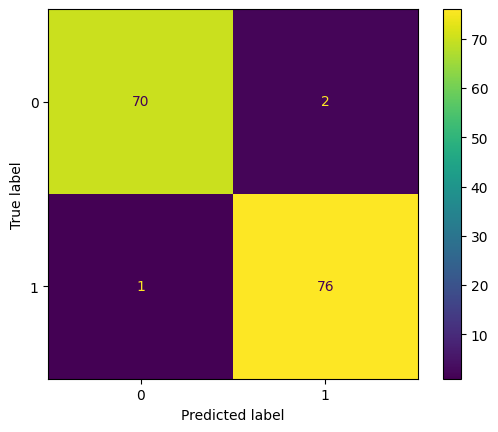

In [27]:
# Display the confusion matrix
disp.plot();